[0. 0. 0.]
number of iterations:3751
Thetas:[-8.91300542  0.99455111  0.80525732]
Final cost: 0.24168390166987


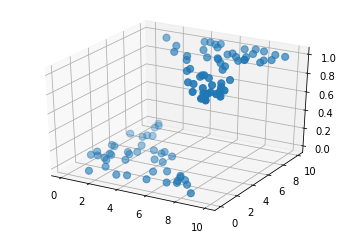

Number of hours studied: 8
Number of hours slept: 5
predicted pass value: 1


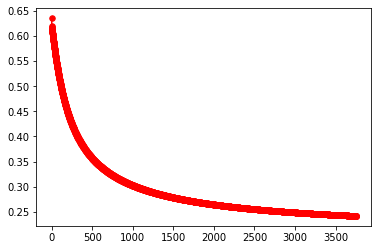

In [1]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

X = np.array(pd.read_csv('./data_classification.csv'))

n=3
alpha = 0.1
prevtheta = np.zeros(n)
theta = np.zeros(n)
print(theta)

clav = X[:,2]
par1 = X[:,0]
par2 = X[:,1]
par0 = np.array([1 for i in range(len(par1))])

tol = 0.0001
max_it = 100000

it=1

yval = []
xval=[]
while it<=max_it:
    
    
    for i in range(len(theta)):
        prevtheta[i]=theta[i]
    sum=0
    
    
    val = theta[0]*par0 + theta[1]*par1 + theta[2]*par2
    
    sigmv = 1/(1+ np.exp(-val))
    hdiffva = (sigmv)-clav

    theta[0] = theta[0] - alpha*np.mean(hdiffva*par0)
    theta[1] = theta[1] - alpha*np.mean(hdiffva*par1)
    theta[2] = theta[2] - alpha*np.mean(hdiffva*par2)
    
    htheta = 1/(1 + np.exp(-1*(theta[0] + theta[1]*par1 + theta[2]*par2)))
    costv = np.mean(-clav * np.log(htheta) - (1-clav)*np.log(1-htheta))
    yval.append(costv)
    xval.append(it)
    
    difftheta = abs((theta - prevtheta)/theta)
    
    if not (False in (difftheta<tol)):
        break
    
    it=it+1

print('number of iterations:' + str(it))
    
print('Thetas:' + str(theta))

htheta = 1/(1 + np.exp(-1*(theta[0] + theta[1]*par1 + theta[2]*par2)))


costv = np.mean(-clav * np.log(htheta) - (1-clav)*np.log(1-htheta))
print('Final cost:', str(costv))

outv = []

for i in range(len(X)):
    ans =  1/(1 + np.exp(-1*(theta[0] + theta[1]*par1[i] + theta[2]*par2[i])))
    if ans>=0.5:
        outv.append(1)
    else:
        outv.append(0)
        
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.scatter(par1,par2,outv,s=50)

plt.show()
        


num1 = 8
num2 = 5

ans =  1/(1 + np.exp(-1*(theta[0] + theta[1]*num1 + theta[2]*num2)))

if ans>=0.5:
    pred=1
else:
    pred=0
    

    
print('Number of hours studied:', str(num1))
print('Number of hours slept:', str(num2))
print('predicted pass value:', str(pred))


plt.plot(xval,yval,c='r')
plt.scatter(xval,yval,s=30,c='r')
   
plt.show()

#for i in range(len(par0)):
#    print(str(1/(1 + np.exp(-1*(theta[0] + theta[1]*par1[i] + theta[2]*par2[i])))) + ' ' + str(clav[i]))